In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("fraud_detection.csv")

In [3]:
df.columns

Index(['transaction_amount', 'transaction_risk_score', 'is_fraud'], dtype='object')

In [4]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [5]:
df["is_fraud"].unique()

array([0, 1])

In [6]:
df["is_fraud"].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [7]:
#imbalanced dataset

In [8]:
X = df.drop("is_fraud",axis=1)
y= df["is_fraud"]

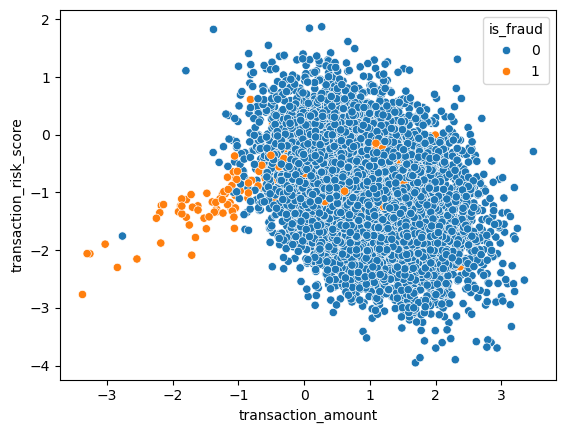

In [9]:
sns.scatterplot(x=X["transaction_amount"],y=X["transaction_risk_score"],hue=y)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
penalty = ["l1","l2","elasticnet"]
c_values = [100 , 10 , 1 , 0.1 , 0.01]
solver = ["newton-cg","lbfgs","liblinear","sag","saga,","newton-cholesky"]
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [14]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [15]:
params = dict(penalty = penalty, C = c_values, solver = solver , class_weight = class_weight)

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid = GridSearchCV(estimator=model ,param_grid=params,scoring="accuracy",cv=5)

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga,', 'newton-cholesky']},
             scoring='accuracy')

In [20]:
y_pred = grid.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix

In [23]:
score = accuracy_score(y_pred,y_test)
print("score:",score)
print(classification_report(y_pred,y_test))
print("confusion matrix \n",confusion_matrix(y_pred,y_test))

score: 0.9893333333333333
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2977
           1       0.41      0.87      0.56        23

    accuracy                           0.99      3000
   macro avg       0.70      0.93      0.78      3000
weighted avg       0.99      0.99      0.99      3000

confusion matrix 
 [[2948   29]
 [   3   20]]


In [24]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [25]:
# roc , auc

In [26]:
model_prob = grid.predict_proba(X_test)

In [27]:
model_prob

array([[0.99541523, 0.00458477],
       [0.85804185, 0.14195815],
       [0.95194979, 0.04805021],
       ...,
       [0.96100575, 0.03899425],
       [0.98625237, 0.01374763],
       [0.76576844, 0.23423156]])

In [28]:
model_prob = model_prob[:,1] #probabilities for the positive (fraud) class

In [29]:
model_prob

array([0.00458477, 0.14195815, 0.04805021, ..., 0.03899425, 0.01374763,
       0.23423156])

In [30]:
from sklearn.metrics import roc_curve , roc_auc_score

In [31]:
model_auc = roc_auc_score(y_test , model_prob)

In [32]:
model_auc.item()

0.779196260001798

In [33]:
model_fpr , model_tpr , treshold = roc_curve(y_test,model_prob)

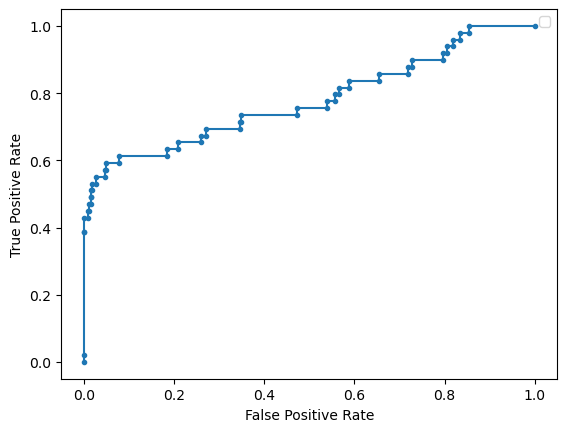

In [34]:
plt.plot(model_fpr,model_tpr,marker = ".",label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend("")
plt.show()


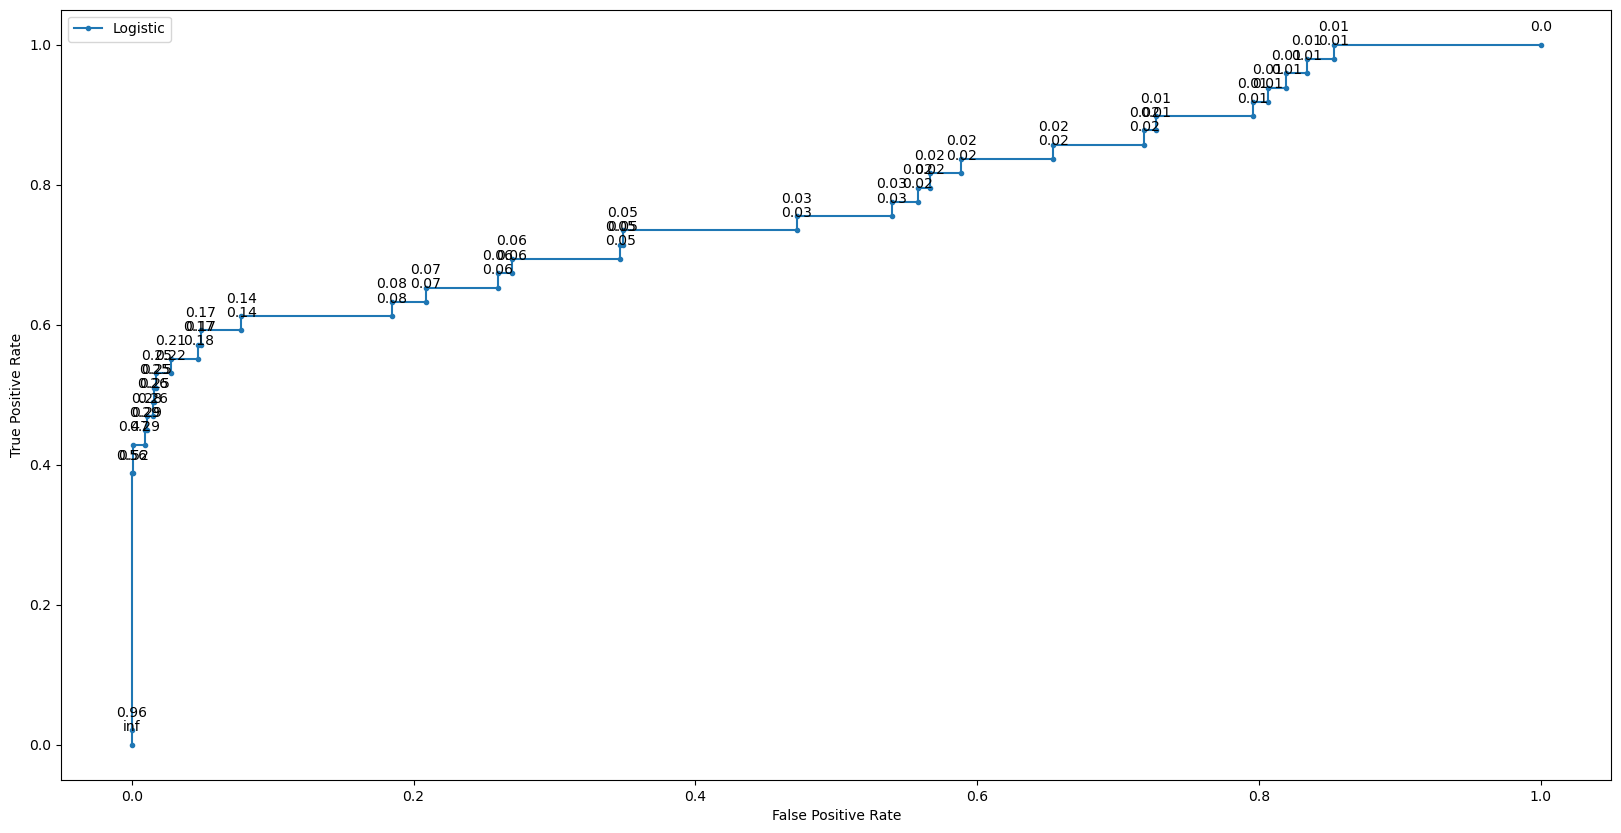

In [37]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot ROC curve
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, treshold):
    ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# Labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
plt.show()

In [38]:
# Pick a custom threshold (e.g., from your annotated ROC curve)
custom_threshold = 0.2  # You can change this to what you chose

# Predict using custom threshold
y_pred_custom = (model_prob >= custom_threshold).astype(int)
print(model_prob >= custom_threshold)
print(y_pred_custom)

# Evaluate
print(f"\n Evaluation using custom threshold = {custom_threshold}")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[False False False ... False False  True]
[0 0 0 ... 0 0 1]

 Evaluation using custom threshold = 0.2
[[2854   97]
 [  22   27]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2951
           1       0.22      0.55      0.31        49

    accuracy                           0.96      3000
   macro avg       0.61      0.76      0.65      3000
weighted avg       0.98      0.96      0.97      3000



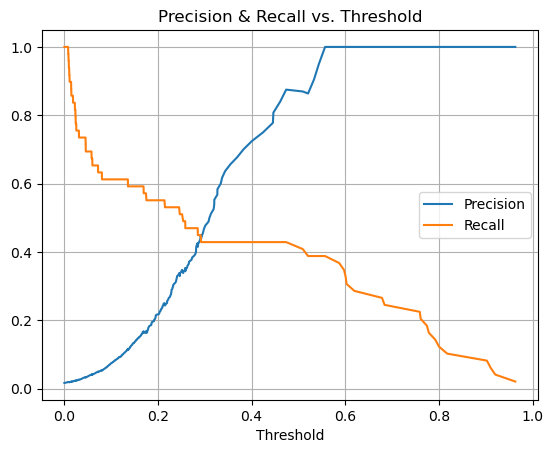

In [39]:
#If you want to find the best threshold based on precision, recall, or F1 you can plot Performance Metrics at Different Thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, model_prob)

# Plot precision and recall vs threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.grid()
plt.show()